### Welcome to my Capstone #2 Project - Redfin Real Estate Values for Cuyahoga County (Cleveland) Ohio 

# Problem Statement:

IS THE CLE MARKET A GOOD INVESTMENT?  WHAT IS THE PURCHASING TRENDS FOR EITHER THE SUBURBS THE MAIN CITY OR BOTH - ESPECIALLY POST COVID?

My venture capital real estate company has asked me to report on the most recent trends for the 441xx zipcode region of NE Ohio, specifically Cuyahoga County which is the Cleveland and inner suburbs, a ~15 mile radius.

We are developing an algorithm to look at the Cleveland/ Cuyahoga County area to see any trends or insights in the data set we have from redfin.com. We have developed an extra large data set of 30,000 home sales, which after cleaning left us with well over 20,000 sales in the dataset within the last two years.

We are interested in seeing trends, especially pre and post, COVID. The goal of our analysis is the production of an algorithm, found in the r2, and the P value. 

This algorithm will enable us to predict a favorable sale price depending upon the variables involved. 

So when you plug in the algorithm with different variables, it will give you a accurate prediction within X amount of accuracy.

Our goal is to derive the most valuable trends, insights, and correlations from various features of the homes based on 2 years of sales data.

I am going to use python to explore, analyze and visualize the data the get business insignts of the house price for the realtors, developers and investors. I will generate a regression model to predict the house price. 


## How I Acquired My Data
On redfin.com there are data about real estate transactions. Many of these regions are downloadable, some are not for reasons unknown to me.

I was able to download up to 10000 datapoints filtered by SOLD status, and SINGLE FAMILY type, and 24 MONTHS.

What I was not able to do was exceed that limit; however I was told of a slicing tool ("DRAW") which allows me to trace a loop within the area map which creates a search zone.

Using the more detailed GoogleMap highlighted to Cuyahoga County allowed me to easily see the boundaries of the counties, and minimize my intentional overlap without making any large, unaware errors.

As a result I was able to "lasso" the Northeast, Southeast, West and Southwest side of Cuyahoga county.

All 4 zone downloads gave me just under 35K data points. But there was another important step to accomplish before setting up this Jupyter Notebook

## Removing Out Of County Data
I knew there would be a lot of overlap and out of bounds (out of county) data that I would need to eliminate.

To minimize any additional complexity, I consolidated all four datasets into an Excel CSV file just under 35K rows.

I then filtered by CITY (I thought there was a COUNTY column but was mistaken). I located all the CITY column items that looked like they were out of the county. I googled a comprehensive list of towns in the county, then located the foreign cities, and googled each of the foreign cities to double verify they were out of the county.

My dataset was still just under 33K rows, my skilled lassoing of county areas was quite good relative to the minute or two it took me to trace the lasso on the map.

Minimal Cleaning in Excel
Because I have 4 datasets I had 4 identical sets of headers when I consolidated them. So I removed the redundant 3 rows of headers.

The HOA column had many blanks/NULLS. I changed all blanks to zeros to get this piece out of the way.

## Python From Here Out
While I realize the ENTIRE project is to be done in Python, the fact that I created a dataset 3x larger than expected should hopefully mitigate the fact that I wanted to start with a consolidated dataset.

Also, this is technically just a CSV file and you never would have known I used Excel unless I took the time to transparently explain this (which I didn't need to do)!

Data Source: https://www.redfin.com

### Specifics of My Data Acquisition Methodology:


I was able to download up to 10000 datapoints filtered by SOLD status, and SINGLE FAMILY type, and 24 MONTHS.

What I was not able to do was exceed that limit; however I was told of a slicing tool ("DRAW") which allows me to trace a loop within the area map which creates a search zone.

Using the more detailed GoogleMap highlighted to Cuyahoga County allowed me to easily see the boundaries of the counties, and minimize my intentional overlap without making any large, unaware errors.

As a result I was able to "lasso" the Northeast, Southeast, West and Southwest side of Cuyahoga county.

All 4 zone downloads gave me just under 35K data points. But there was another important step to accomplish before setting up this Jupyter Notebook

Removing Out Of County Data
I knew there would be a lot of overlap and out of bounds (out of county) data that I would need to eliminate.

To minimize any additional complexity, I consolidated all four datasets into an Excel CSV file just under 35K rows.

I then filtered by CITY (I thought there was a COUNTY column but was mistaken). I located all the CITY column items that looked like they were out of the county. I googled a comprehensive list of towns in the county, then located the foreign cities, and googled each of the foreign cities to double verify they were out of the county.

My dataset was still just under 33K rows, my skilled lassoing of county areas was quite good relative to the minute or two it took me to trace the lasso on the map.

Data Cleaning in Excel Because there were so many NULL values in dozens of columns, it would create a very long, slow Jupyter notebook unless I used the commonsense tools in Excel to clean many of these. Doubtless I would have additional data to realize that I need to clean within the Jupyter notebook.

One example in Excel: The HOA column had many blanks/NULLS. I changed all blanks to zeros to get this piece out of the way.

Data Source: https://www.redfin.com

# Description of Variables:

(drop) SALE TYPE - all are PAST SALE - ie SOLD :)

SOLD DATE - Date of Sale

PROPERTY TYPE - Filtered to SINGLE FAMILY only.

ADDRESS - property address

CITY - property city

STATE OR PROVINCE - property state (Ohio)

ZIP OR POSTAL CODE - property zip code

PRICE - property price

BEDS - # Bedrooms

BATHS - # Bathrooms

(drop) LOCATION - Neighborhood (to be filtered)

SQUARE FEET - # Square Footage

LOT SIZE - Size of Lot

YEAR BUILT - Will change this to AGE OF HOME.

DAYS ON MARKET - Days On Market

$/SQ FT - Cost Per Square Foot - (Price / SQFT)

HOA/MONTH - HOA Fees if any

(drop) STATUS - Redundant, filtered to SOLD

LATITUDE - Geographic Latitude

LONGITUDE - Geographic Longitude

# Data Cleansing and Data Preparation

1. Import packages

In [5]:
# import Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md
%matplotlib inline

# import Seaborn
import seaborn as sns
# import pandas
import pandas as pd
# import statsmodel.api
import statsmodels.api as sm
# import numpy
import numpy as np

# Load dataset and descriptive summary of statistics.
df=pd.read_csv('CLE_raw_filter7.csv')

print(df.describe())
df.head()

            ZIPCODE         PRICE          BEDS         BATHS   SQUARE FEET  \
count  23918.000000  2.391800e+04  23918.000000  23918.000000  23918.000000   
mean   44120.612635  1.971224e+05      3.365875      2.011341   1778.276235   
std       32.519593  1.622192e+05      0.748044      0.902111    855.265384   
min    41111.000000  7.500000e+02      0.000000      1.000000    440.000000   
25%    44116.000000  1.099000e+05      3.000000      1.500000   1223.000000   
50%    44125.000000  1.600000e+05      3.000000      2.000000   1536.000000   
75%    44135.000000  2.385000e+05      4.000000      2.500000   2058.750000   
max    44149.000000  4.000000e+06     11.000000     13.500000  21772.000000   

           LOT SIZE    YEAR BUILT  DAYS ON MARKET       $/SQ FT     HOA/MONTH  \
count  2.391800e+04  23918.000000    23918.000000  23918.000000  23918.000000   
mean   1.399775e+04   1951.718371      347.085710    105.497826      5.910486   
std    4.405505e+04     26.076464      208.68

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIPCODE,PRICE,BEDS,BATHS,...,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQ FT,HOA/MONTH,STATUS,LATITUDE,LONGITUDE,PREDICTION
0,PAST SALE,November-19-2019,Single Family Residential,469 Canterbury Rd,Bay Village,OH,44140,180000,3,1.0,...,1056,6534,1940,441,170,0,Sold,41.482058,-81.910828,75913.4251
1,PAST SALE,July-13-2020,Single Family Residential,2161 Richland Ave,Lakewood,OH,44107,220000,3,2.0,...,1392,5227,1919,204,158,0,Sold,41.472586,-81.790642,167394.6237
2,PAST SALE,January-8-2020,Single Family Residential,22503 Sandy Ln,Fairview Park,OH,44126,215000,3,2.0,...,1776,10018,1964,391,121,0,Sold,41.431656,-81.869835,211996.9037
3,PAST SALE,September-6-2019,Single Family Residential,1616 Belle Ave,Lakewood,OH,44107,280000,4,2.5,...,2500,7405,1912,515,112,0,Sold,41.479358,-81.797391,294099.6450
4,PAST SALE,June-4-2019,Single Family Residential,2868 Wooster Rd,Rocky River,OH,44116,223500,3,1.5,...,1440,9147,1912,609,155,0,Sold,41.467073,-81.838115,138277.1346


2. Data Cleaning (Null Values)- 

Let's check for Null values - I should have already cleaned these in Excel as every column had a large number of NULLS and I didn't want to complicate this dataset which was 10 times larger than recommended in the guidelines!

In [6]:
print(df.isnull().sum())

df.isnull().values.any()

SALE TYPE            0
SOLD DATE            0
PROPERTY TYPE        0
ADDRESS              0
CITY                 0
STATE OR PROVINCE    0
ZIPCODE              0
PRICE                0
BEDS                 0
BATHS                0
LOCATION             0
SQUARE FEET          0
LOT SIZE             0
YEAR BUILT           0
DAYS ON MARKET       0
$/SQ FT              0
HOA/MONTH            0
STATUS               0
LATITUDE             0
LONGITUDE            0
PREDICTION           0
dtype: int64


False

## Let's Change Column Names And Drop Others Off the DataFrame.

1. Cut several columns that are not helping me to interpret.


## LIST OF COLUMNS - Here are the CUT columns and my reason why I cut them:
#### SALE TYPE | ADDRESS | STATE | LOCATION | STATUS | NEXT O.H. START/END TIME | URL | SOURCE | MLS# | FAV | INT

The first thing I will do is evaluate which columns don't even belong here in the first place. Unnecessary columns will be removed to strengthen the signal to noise ratio in our analysis dataset.

I will DROP the following:

SALE TYPE - all are "past sale" - redundant

PROPERTY TYPE - all are "single family"

STATE OR PROVINCE - all are "Ohio",  The CLE metro is 80 miles from the nearest state line.

LOCATION - I don't need neighborhood-specific information; zip code will work better for this.

STATUS - all are sold!

In [7]:
#Dropping unnecessary columns

df=df.drop('SALE TYPE', axis=1)
df=df.drop('PROPERTY TYPE', axis=1)
df=df.drop('STATE OR PROVINCE', axis=1)
df=df.drop('LOCATION', axis=1)
df=df.drop('STATUS', axis=1)

df.info()
print(df.describe())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23918 entries, 0 to 23917
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SOLD DATE       23918 non-null  object 
 1   ADDRESS         23918 non-null  object 
 2   CITY            23918 non-null  object 
 3   ZIPCODE         23918 non-null  int64  
 4   PRICE           23918 non-null  int64  
 5   BEDS            23918 non-null  int64  
 6   BATHS           23918 non-null  float64
 7   SQUARE FEET     23918 non-null  int64  
 8   LOT SIZE        23918 non-null  int64  
 9   YEAR BUILT      23918 non-null  int64  
 10  DAYS ON MARKET  23918 non-null  int64  
 11  $/SQ FT         23918 non-null  int64  
 12  HOA/MONTH       23918 non-null  int64  
 13  LATITUDE        23918 non-null  float64
 14  LONGITUDE       23918 non-null  float64
 15  PREDICTION      23918 non-null  float64
dtypes: float64(4), int64(9), object(3)
memory usage: 2.9+ MB
            ZIPCODE

,SOLD DATE,ADDRESS,CITY,ZIPCODE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQ FT,HOA/MONTH,LATITUDE,LONGITUDE,PREDICTION
0,November-19-2019,469 Canterbury Rd,Bay Village,44140,180000,3,1.0,1056,6534,1940,441,170,0,41.482058,-81.910828,75913.4251
1,July-13-2020,2161 Richland Ave,Lakewood,44107,220000,3,2.0,1392,5227,1919,204,158,0,41.472586,-81.790642,167394.6237
2,January-8-2020,22503 Sandy Ln,Fairview Park,44126,215000,3,2.0,1776,10018,1964,391,121,0,41.431656,-81.869835,211996.9037
3,September-6-2019,1616 Belle Ave,Lakewood,44107,280000,4,2.5,2500,7405,1912,515,112,0,41.479358,-81.797391,294099.6450
4,June-4-2019,2868 Wooster Rd,Rocky River,44116,223500,3,1.5,1440,9147,1912,609,155,0,41.467073,-81.838115,138277.1346


## Let's Convert YEAR BUILT into a better variable "HOUSE AGE"

In [8]:
# Converting Year Built into variable, "House Age"
df['HOUSE AGE'] = 2021 - df['YEAR BUILT']
df.info
print(df.describe())

df=df.drop('YEAR BUILT', axis=1)
df.info()

            ZIPCODE         PRICE          BEDS         BATHS   SQUARE FEET  \
count  23918.000000  2.391800e+04  23918.000000  23918.000000  23918.000000   
mean   44120.612635  1.971224e+05      3.365875      2.011341   1778.276235   
std       32.519593  1.622192e+05      0.748044      0.902111    855.265384   
min    41111.000000  7.500000e+02      0.000000      1.000000    440.000000   
25%    44116.000000  1.099000e+05      3.000000      1.500000   1223.000000   
50%    44125.000000  1.600000e+05      3.000000      2.000000   1536.000000   
75%    44135.000000  2.385000e+05      4.000000      2.500000   2058.750000   
max    44149.000000  4.000000e+06     11.000000     13.500000  21772.000000   

           LOT SIZE    YEAR BUILT  DAYS ON MARKET       $/SQ FT     HOA/MONTH  \
count  2.391800e+04  23918.000000    23918.000000  23918.000000  23918.000000   
mean   1.399775e+04   1951.718371      347.085710    105.497826      5.910486   
std    4.405505e+04     26.076464      208.68

In [9]:
# Changing Column Name to avoid errors later.

df.rename(columns={'ZIP OR POSTAL CODE': 'ZIPCODE'}, inplace=True)
df.info()

print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23918 entries, 0 to 23917
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SOLD DATE       23918 non-null  object 
 1   ADDRESS         23918 non-null  object 
 2   CITY            23918 non-null  object 
 3   ZIPCODE         23918 non-null  int64  
 4   PRICE           23918 non-null  int64  
 5   BEDS            23918 non-null  int64  
 6   BATHS           23918 non-null  float64
 7   SQUARE FEET     23918 non-null  int64  
 8   LOT SIZE        23918 non-null  int64  
 9   DAYS ON MARKET  23918 non-null  int64  
 10  $/SQ FT         23918 non-null  int64  
 11  HOA/MONTH       23918 non-null  int64  
 12  LATITUDE        23918 non-null  float64
 13  LONGITUDE       23918 non-null  float64
 14  PREDICTION      23918 non-null  float64
 15  HOUSE AGE       23918 non-null  int64  
dtypes: float64(4), int64(9), object(3)
memory usage: 2.9+ MB
            ZIPCODE

In [80]:
# changing datatype for some variables to avoid problems later.

df.BATHS = df.BATHS.astype(int)

df.info()
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23918 entries, 0 to 23917
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SOLD DATE       23918 non-null  object 
 1   ADDRESS         23918 non-null  object 
 2   CITY            23918 non-null  object 
 3   ZIPCODE         23918 non-null  int64  
 4   PRICE           23918 non-null  int64  
 5   BEDS            23918 non-null  int64  
 6   BATHS           23918 non-null  int64  
 7   SQUARE FEET     23918 non-null  int64  
 8   LOT SIZE        23918 non-null  int64  
 9   DAYS ON MARKET  23918 non-null  int64  
 10  $/SQ FT         23918 non-null  int64  
 11  HOA/MONTH       23918 non-null  int64  
 12  LATITUDE        23918 non-null  float64
 13  LONGITUDE       23918 non-null  float64
 14  PREDICTION      23918 non-null  float64
 15  HOUSE AGE       23918 non-null  int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 2.9+ MB
            ZIPCOD

# Part 1: Descriptive Statistics

### Step 1: Create a Scatterplot of Longitude, Latitude and Price (ALL Values).

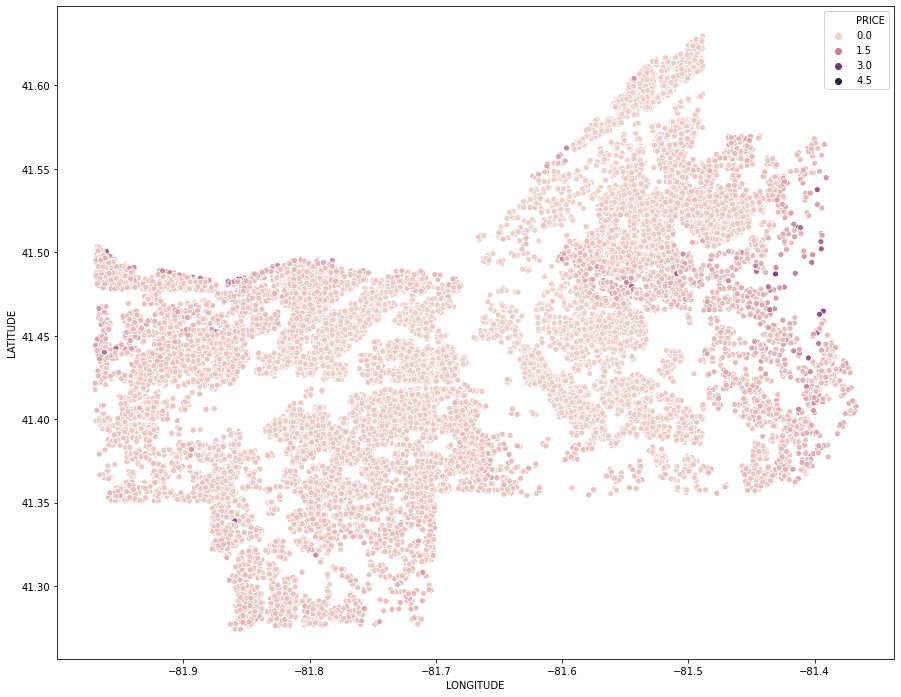

In [10]:
plt.figure(figsize=(15,12))
sns.scatterplot(x='LONGITUDE',y='LATITUDE',data=df,hue='PRICE')

#### Insight: The Shaker Blvd corridor, Westside Lakeshore, and far east/County Line Road corridor have the highest home values. These are affluent areas so this data visualization shows as expected.

### Step 2: Create a barchart of Price and zipcode.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]),
 <a list of 52 Text major ticklabel objects>)

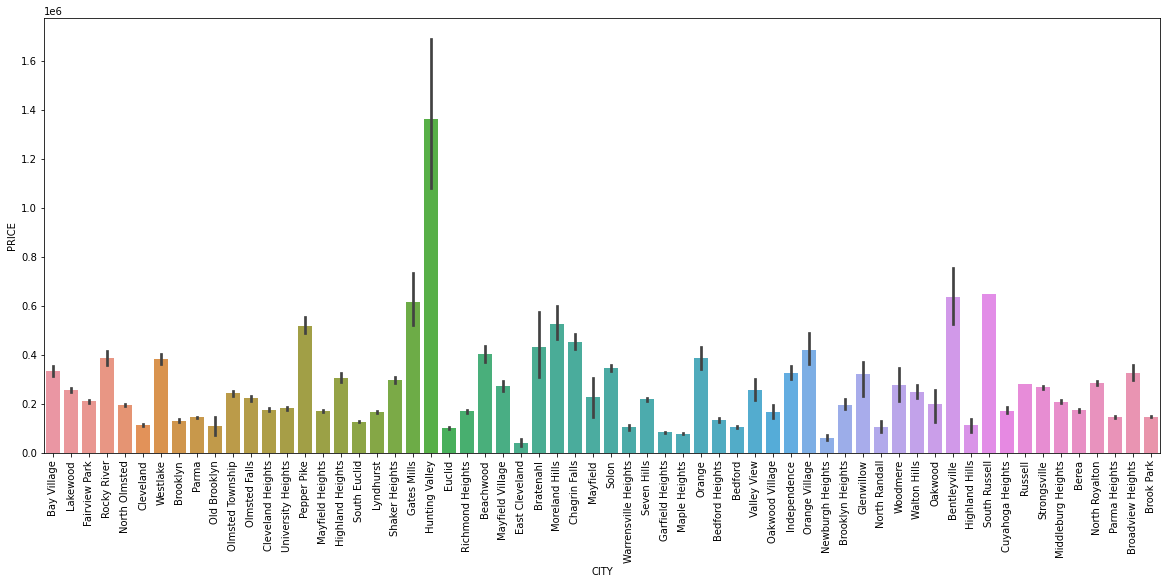

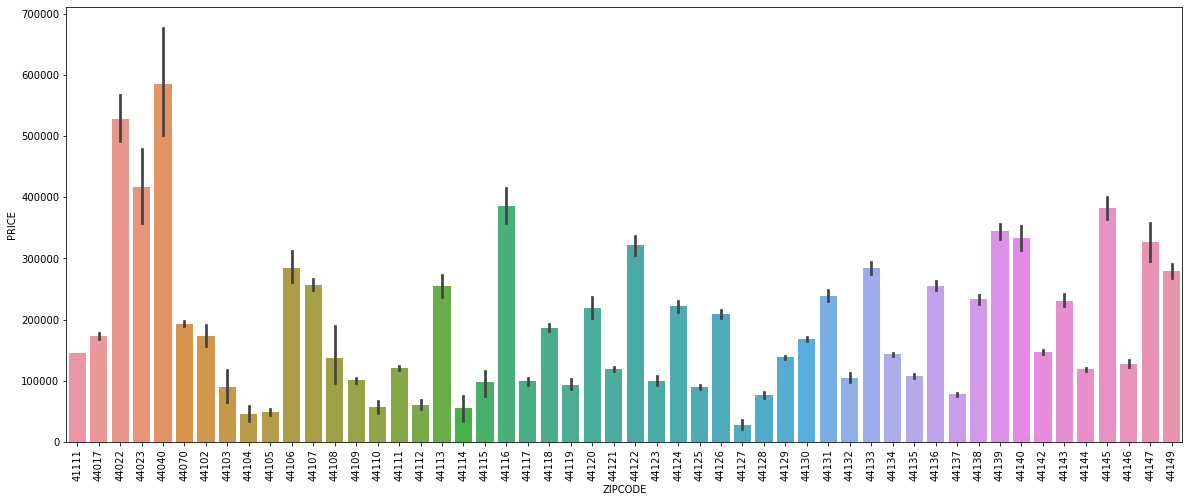

In [11]:
plt.figure(figsize=(20,8))
sns.barplot(x="CITY", y="PRICE", data=df)
plt.xticks(rotation=90)

plt.figure(figsize=(20,8))
sns.barplot(x="ZIPCODE", y="PRICE", data=df)
plt.xticks(rotation=90) 

#### Conclusion: Zipcode 44040 has the average highest price in Cuyahoga County. Zipcode 44022, 44023 and 44116 are also leading the housing prices in Cuyahoga County.  However, these prices are in affluent neighborhoods with much lower COUNT of sales.

The highest performing cities are also sparsely populated with very few sales.

### <font color='red'>Insights: 
Based on the price, zipcode, longitude and latitude, we can build three sales teams that focus on different markets. 

Team 1 should zero in on wealthy clients to sell the houses located in the zipcodes 44040, 44022, 44023 and 44116. 

Team 2 should serve new home buyers who are not yet able to afford high house prices.    
The most appropriate houses for them will be located in the zipcode 44104, 44105, 44127, 44114 and 44112. 

Team 3 could focus on other clients - and the target houses could be located in any area in Cuyahoga County. </font>

### Step 3: Create a histogram of Price and a boxplot.


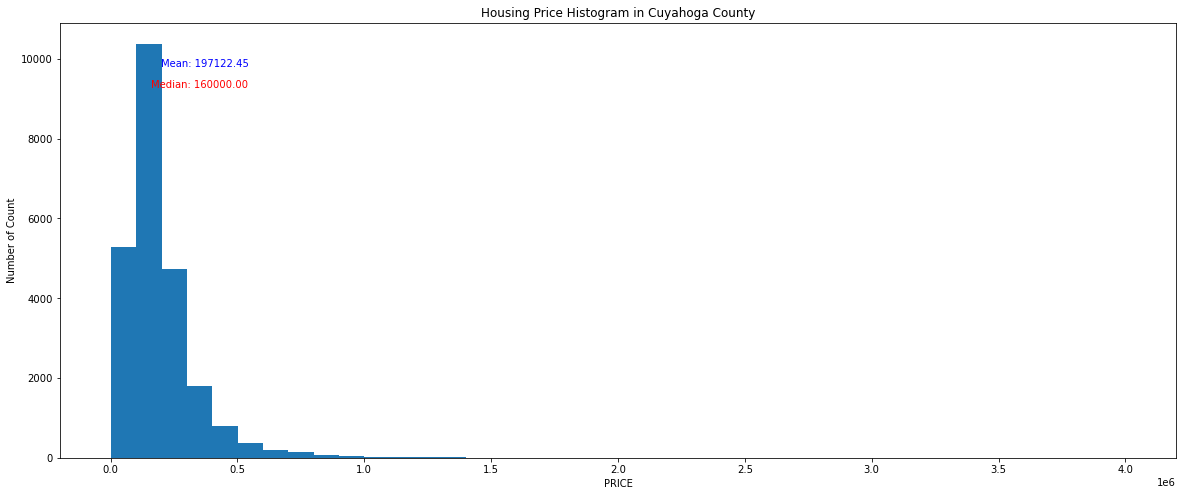

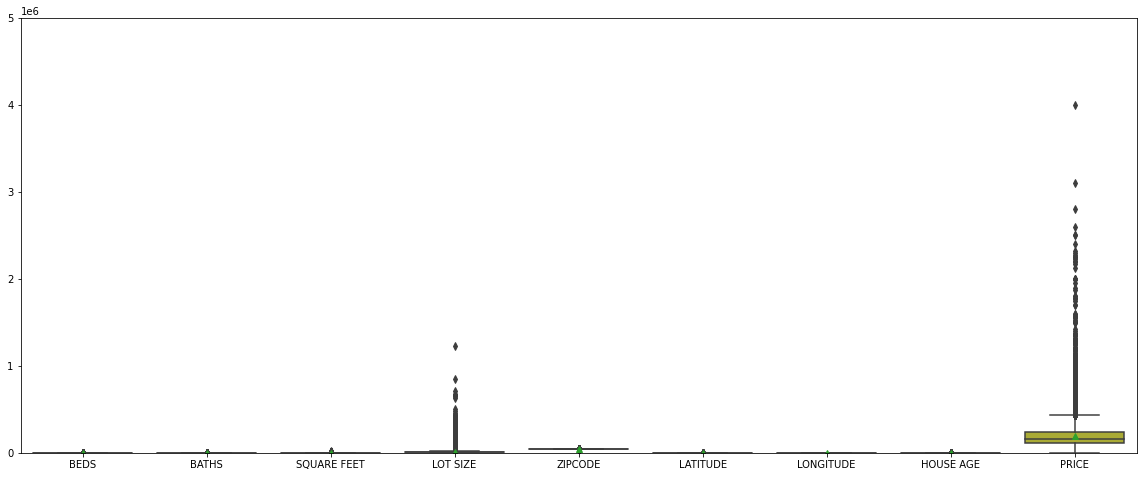

In [12]:
# Create a histogram of Price

plt.figure(figsize=(20,8))

_ = plt.hist(df['PRICE'], bins=40)

_ = plt.xlabel('PRICE')

_ = plt.ylabel('Number of Count')

min_ylim, max_ylim = plt.ylim()
plt.text(df['PRICE'].mean(), max_ylim*0.9, 'Mean: {:.2f}'.format(df['PRICE'].mean()), color='blue')
plt.text(df['PRICE'].median(), max_ylim*0.85, 'Median: {:.2f}'.format(df['PRICE'].median()), color='red')

_= plt.title('Housing Price Histogram in Cuyahoga County')

# Generate boxplot by all variables except for ID and Data since they are not significant.

filt = ['BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'ZIPCODE', 'LATITUDE', 'LONGITUDE',
          'HOUSE AGE','PRICE',]

dff=df[filt]

f, ax = plt.subplots(figsize=(20, 8))
fig = sns.boxplot(data=dff, showmeans=True)
fig.axis(ymin=0, ymax=5000000);

plt.show()

#### Conclusion: Based on the histogram of Price, we know the mean price is \\$197,122, and the median price is \\$160K.  Some properties are outliers which have sold for a price far higher than normal for Cuyahoga County.  Price has many outliers.

### <font color='red'>Insights: 
Since the mean of the price is higher than the median, we know that there are half of the houses in Cuyahoga county are priced under \\$160,000. Our sales team will do well to focus on buyers who have ample funds but do not have an especially high level of income. </font>

### Step 4: Identify Outliers

In [13]:
# Identify number of outliers comparing to whole dataset

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR = Q3-Q1

index=df.index
num_of_entry=len(index)
print(str(num_of_entry))


olfilter = ~((df < Q1 - 1.5 * IQR) | (df > Q3 + 1.5 *IQR)).any(axis=1)
df1= df[olfilter]  
index1=df1.index
num_of_entry1=len(index1)
print(num_of_entry1)

df2 = df[df["PRICE"]<600000]

#We have provided the print line, you need to provide the calculation after the quoted text:
print ("When we have not removed any outliers from the dataset, we have " + str(num_of_entry) + " entries") 


#We have provided the print line, you need to provide the calculation after the quoted text:
print ("When we have removed any outliers from the dataset, we have " + str(num_of_entry1) + " entries")
print ("The proportion of outliers which exist when compared to the dataframe are: " + str(1-num_of_entry1/num_of_entry))


23918
17664
When we have not removed any outliers from the dataset, we have 23918 entries
When we have removed any outliers from the dataset, we have 17664 entries
The proportion of outliers which exist when compared to the dataframe are: 0.26147671209967394


#### Over a quarter (26.1%) of homes sold in Cuyahoga county are outliers!

In [14]:
print(Q3)

ZIPCODE            44135.000000
PRICE             238500.000000
BEDS                   4.000000
BATHS                  2.500000
SQUARE FEET         2058.750000
LOT SIZE           13068.000000
DAYS ON MARKET       536.000000
$/SQ FT              129.000000
HOA/MONTH              0.000000
LATITUDE              41.487798
LONGITUDE            -81.543251
PREDICTION        251675.143525
HOUSE AGE             86.000000
Name: 0.75, dtype: float64


#### The 75% percentile sale price is just under \\$240K. (\\$238.5K)

In [15]:
print(Q1)

ZIPCODE            44116.000000
PRICE             109900.000000
BEDS                   3.000000
BATHS                  1.500000
SQUARE FEET         1223.000000
LOT SIZE            5662.000000
DAYS ON MARKET       161.000000
$/SQ FT               79.000000
HOA/MONTH              0.000000
LATITUDE              41.396870
LONGITUDE            -81.805785
PREDICTION        119761.405675
HOUSE AGE             57.000000
Name: 0.25, dtype: float64


#### The 25% percentile price is just under \\$110K. (\\$109.9K)

We could also correctly say that 50% of the homes sold are between ~\\$110K and ~\\$240K, and 50% are outside of that range.

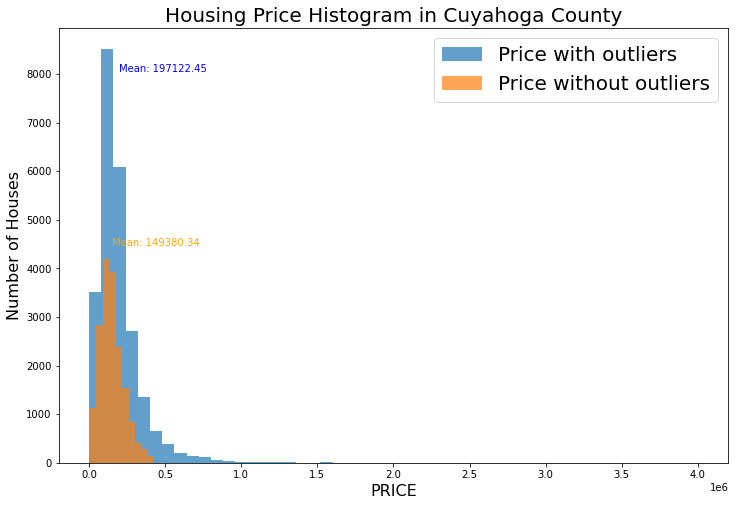

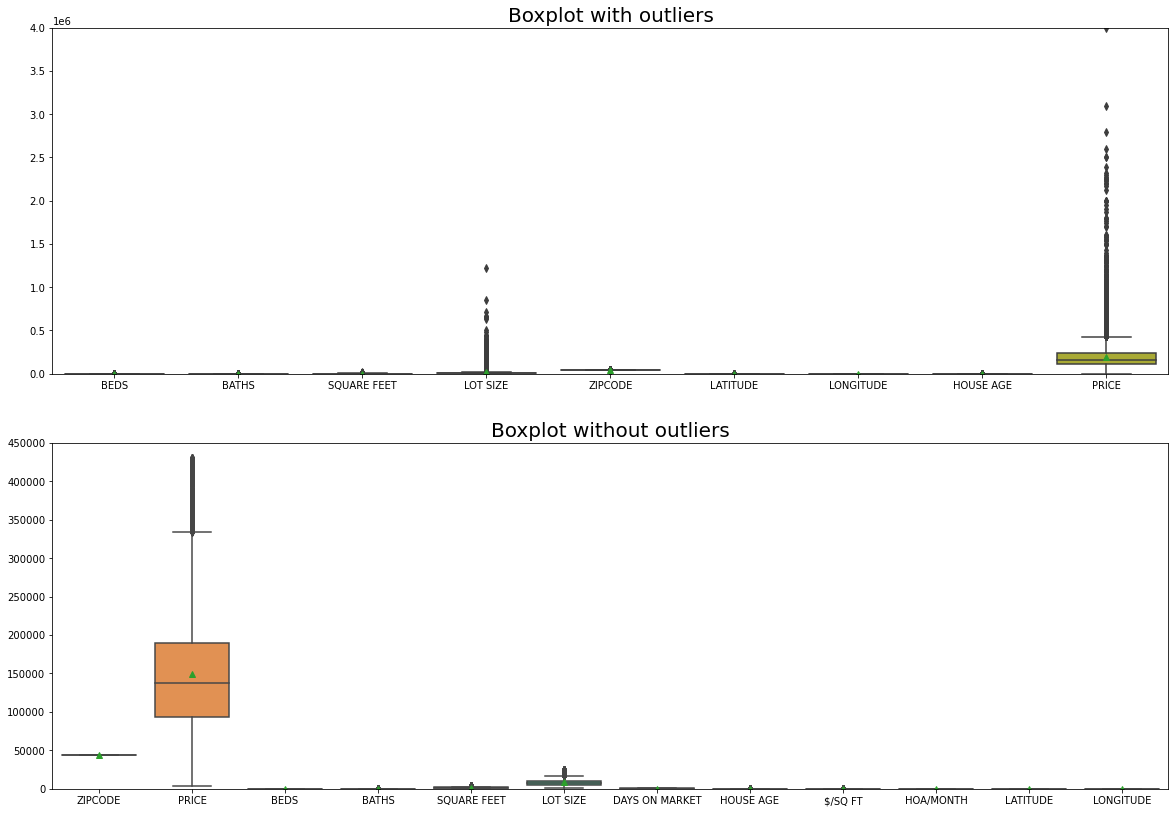

NameError: name 'ymin30000' is not defined

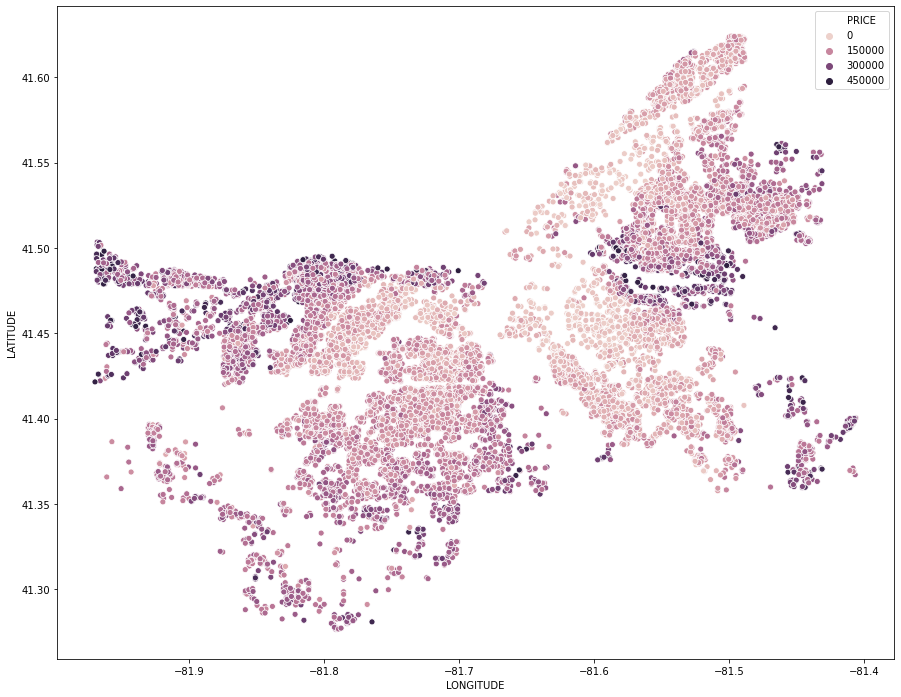

In [16]:
# Create a histogram of Price without Outliers

plt.figure(figsize=(12,8))

_ = plt.hist(df['PRICE'], bins=50, alpha=0.7, label = 'Price with outliers',)
_ = plt.hist(df1['PRICE'], bins=10, alpha=0.7, label = 'Price without outliers')

_ = plt.xlabel('PRICE', fontsize=16)

_ = plt.ylabel('Number of Houses',fontsize=16)

min_ylim, max_ylim = plt.ylim()
plt.text(df['PRICE'].mean(), max_ylim*0.9, 'Mean: {:.2f}'.format(df['PRICE'].mean()), color='blue')
plt.text(df1['PRICE'].mean(), max_ylim*0.5, 'Mean: {:.2f}'.format(df1['PRICE'].mean()), color='orange')

_= plt.legend(loc='upper right', prop={'size':20})



_= plt.title('Housing Price Histogram in Cuyahoga County', fontsize=20)
plt.show()

;
# Generate boxplot without outliers by all variables since they are not significant.


filt2 = ['SOLD DATE', 'ADDRESS', 'CITY', 'ZIPCODE', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 
         'DAYS ON MARKET', 'HOUSE AGE', '$/SQ FT', 'HOA/MONTH', 'LATITUDE', 'LONGITUDE']

dff2=df1[filt2]



f, ax = plt.subplots(figsize=(20, 14))
plt.subplot(2,1,1)
fig = sns.boxplot(data=dff, showmeans=True)
fig.axis(ymin=0, ymax=4000000)
plt.title('Boxplot with outliers',fontsize=20)

;
plt.subplot(2,1,2)
fig2 = sns.boxplot(data=dff2, showmeans=True)
fig2.axis(ymin=0, ymax=450000)
plt.title('Boxplot without outliers',fontsize=20)
;
plt.show()
;

plt.figure(figsize=(15,12))
fig3 = sns.scatterplot(x='LONGITUDE',y='LATITUDE',data=dff2,hue='PRICE')
fig3.axis(ymin30000, ymax=600000)
plt.title('Scatterplot - NO Outliers',fontsize=20)
;



#### Conclusion:  There are 17664 rows when outliers are removed, compared to 23918 total rows in this dataset. The outliers comprise 26% of the dataset.  This is a very high percentage of the dataset to remove.

With outliers removed, the geographical scatterplot of the county is much easier to see, as the value disparities between the city of Cleveland vs. the suburbs becomes clear to the naked eye.

If we remove the outliers with higher percentage of the dataset, the mean of Price will be lower and the shape of the graph will change significantly. 

#### We will keep both options open in order to see which data is a better predictor - with or without outliers in order to predict price.

### <font color='red'>Insights: 
Since the percentage of outliers are high. it may be not a good idea to create a regression model without outliers. </font>

### Step 5: Plot the relationship between Price and variables in one chart.

[]

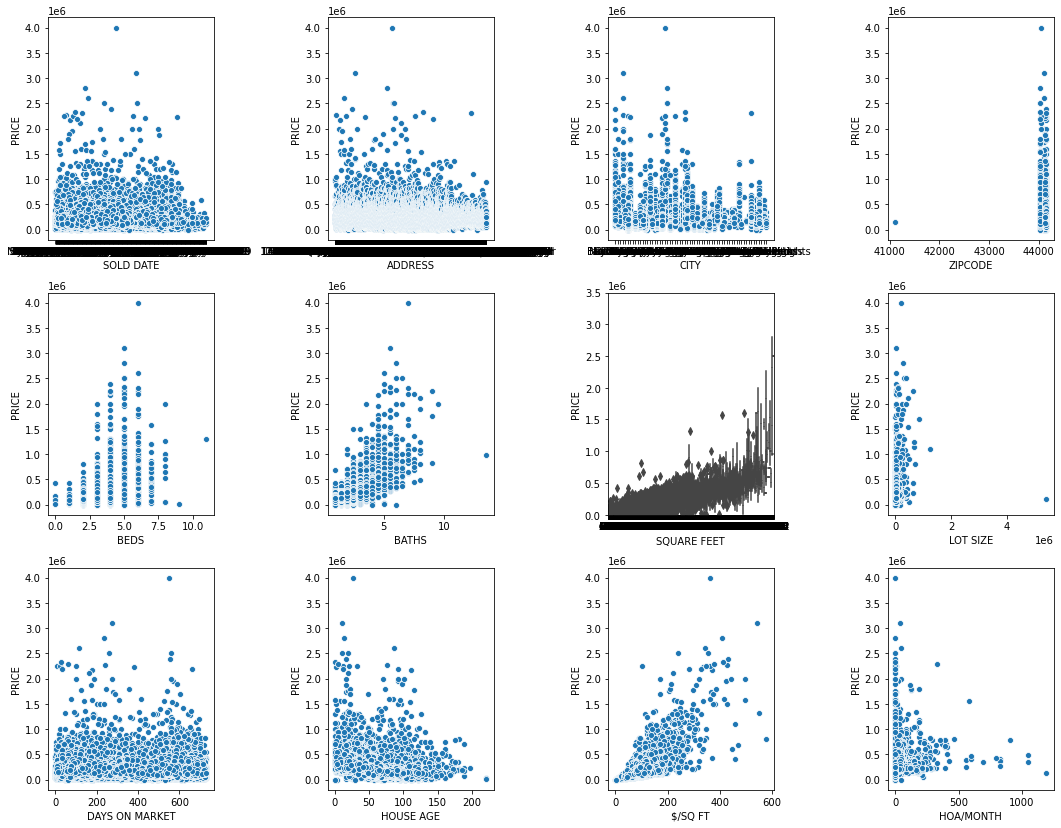

In [17]:
#SOLD DATE', 'ADDRESS', 'CITY', 'ZIPCODE', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 
#'LOT SIZE', 'DAYS ON MARKET', 'HOUSE AGE', '$/SQ FT', 'HOA/MONTH', 'LATITUDE', 'LONGITUDE']
##Step two-- plot the relationship between price and variables


plt.figure(figsize=(15,15))


plt.title('RELATIONSHIP BETWEEN PRICE AND VARIABLES')

plt.subplot(4,4,1)
sns.scatterplot(y='PRICE',x='SOLD DATE',data=df);

plt.subplot(4,4,2)
sns.scatterplot(y='PRICE',x='ADDRESS',data=df);

plt.subplot(4,4,3)
sns.scatterplot(y='PRICE',x='CITY',data=df);

plt.subplot(4,4,4)
sns.scatterplot(y='PRICE',x='ZIPCODE',data=df);


plt.subplot(4,4,5)
sns.scatterplot(y='PRICE',x='BEDS',data=df);

plt.subplot(4,4,6)
sns.scatterplot(y='PRICE',x='BATHS',data=df);

plt.subplot(4,4,7)
fig = sns.boxplot(y="PRICE",x='SQUARE FEET',data=df);
fig.axis(ymin=0, ymax=3500000);

plt.subplot(4,4,8)
sns.scatterplot(y='PRICE',x='LOT SIZE',data=df);

plt.subplot(4,4,9)
sns.scatterplot(y='PRICE',x='DAYS ON MARKET',data=df);

plt.subplot(4,4,10)
sns.scatterplot(y='PRICE',x='HOUSE AGE',data=df);

plt.subplot(4,4,11)
sns.scatterplot(y='PRICE',x='$/SQ FT',data=df);

plt.subplot(4,4,12)
sns.scatterplot(y='PRICE',x='HOA/MONTH',data=df);

plt.tight_layout()
plt.plot()

#### Conclusion:  
1. Looks like the price is positive related to square feet of living room, square feet aove ground and average size of closest 15 houses in square feet, condition and grade and the level of view, bedroom and bathroom.
2. The houses with waterfront have higher average price than the ones without waterfront. But the gap is not too much.
3. Price does not obviously related to size of the lot in square feet, square feet below ground and average size of the closest 15 houses’ lots, in square feet, house age, year renovated.
4. The house wiht 2 floors have average higher price than the houses with 1 or 3 floors.

### <font color='red'>Insights: 
Realtor can better help client analyze that the price based on the square feet of living room, square feet above ground and bedroom and bathroom and floors.If those variables have high value, it is good to convince the client to invest since the increasing price is highly related to those factors.   </font>

# Part 2: Inferential Statistical Analysis

### Step 6: Create Heatmap and Barplot to show correlations.

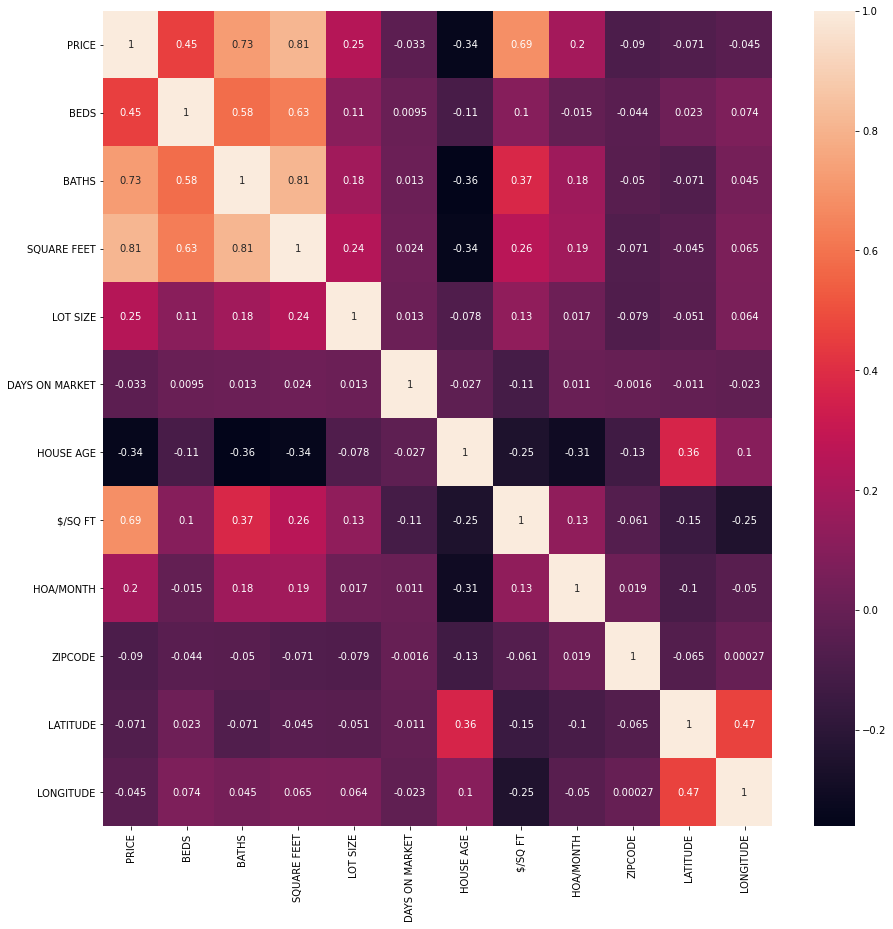

In [18]:
# Create Heatmap to show correlations.

filtc = ['PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'DAYS ON MARKET', 'HOUSE AGE', '$/SQ FT', 'HOA/MONTH', 'CITY', 'ZIPCODE', 'LATITUDE', 'LONGITUDE']

df = df[filtc]
mpl.rcParams['figure.figsize'] = (15,15)

Var_Corr = df.corr()

sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

plt.show()


#### Conclusion:  The variables which have high correlation with price includes Beds, Baths, Square Feet, Lot Size, HOA/Month.  Lot size is smaller than expected. This may be due to the role of Lake Erie shoreline where expensive lakefront homes & lots are much smaller than more expansive homes with more acreage to the south.

                   PRICE
SQUARE FEET     0.809586
BATHS           0.728284
$/SQ FT         0.685439
BEDS            0.454729
LOT SIZE        0.247899
HOA/MONTH       0.195775
DAYS ON MARKET -0.032765
LONGITUDE      -0.045219
LATITUDE       -0.070922
ZIPCODE        -0.089676
HOUSE AGE      -0.340997


[]

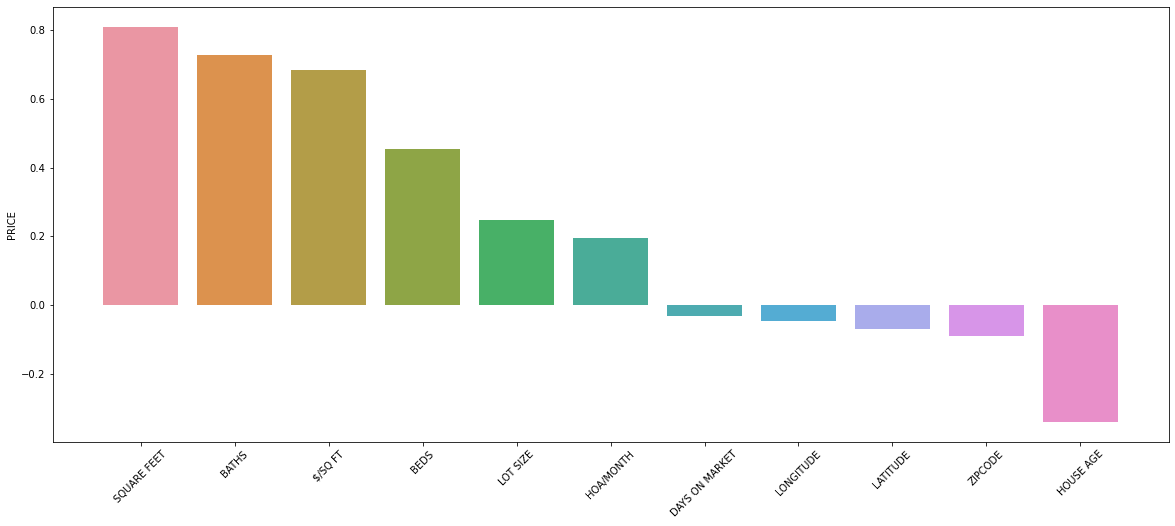

In [19]:
# Create a Barplot of Correlated Features

row = Var_Corr.loc[:,['PRICE']]
row = row.sort_values(by='PRICE', ascending=False).drop('PRICE')

plt.figure(figsize=(20,8))

print(row)

sns.barplot(data=row, x = row.index, y = 'PRICE')
plt.xticks(rotation='45')

plt.plot()

#### Conclusion:  Top 6 variables which have highest correlation with price by order are Square Feet, Baths, \\$/SQ FT, Beds, Lot Size, HOA/Month. Those 6 variables contribute most to the house price. 

DAYS ON MARKET has a logical negative correlation to selling price - this makes sense because the longer it takes to sell a home, the more vulnerable the price will be to lowball offers and a buyer's market. 

Similarly, HOUSE AGE has a strong negative correlation to price. Buyers favor new homes and the Cleveland area is not particularly well known for significant historic architecture as a city like Philadelphia or Boston might be. Therefore the House Age will have a very strong negative correlation to price.

### <font color='red'>Insights: 
Based on the heatmap and Barplot of Correlated Features, the variables Square Feet, Baths, $/SQ FT, Beds, Lot Size, HOA/Month are the main variables to add to the regression model.   </font>

### Step 7: Visualize the detailed correlations for  the top 6 variables which highly correlated to the price. 

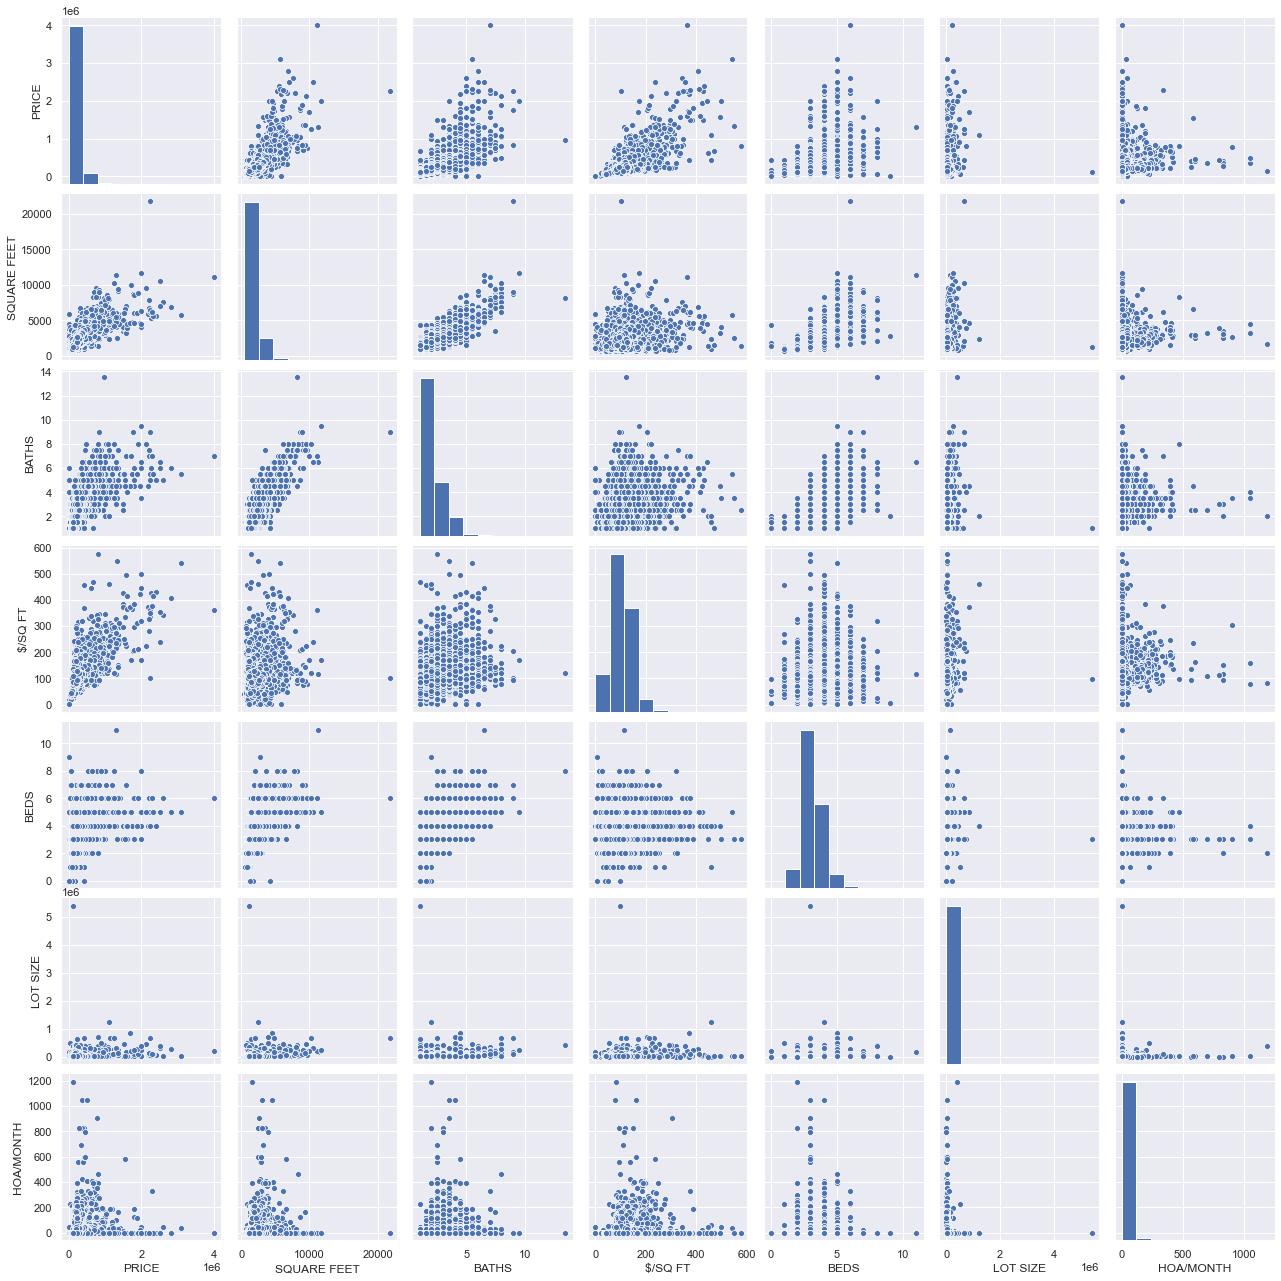

In [24]:
# Based on the heatmap and barplot, we found out the variables Sqft_living, Grade, Sqft_above, View, Bathrooms and Sqft_living15 have correlation with Price.

sns.set()
cols = ['PRICE', 'SQUARE FEET', 'BATHS', '$/SQ FT', 'BEDS', 'LOT SIZE', 'HOA/MONTH']
sns.pairplot(df[cols], height = 2.5)
plt.show();

#### Conclusion:  The above variables are the main variables that need to be included in our regression model.

### Step 8: Use OLS Regression 

In [25]:
np.asarray(df)

array([[180000, 3, 1.0, ..., 44140, 41.4820578, -81.91082809999999],
       [220000, 3, 2.0, ..., 44107, 41.4725858, -81.79064190000001],
       [215000, 3, 2.0, ..., 44126, 41.431656, -81.86983509999999],
       ...,
       [244900, 4, 2.0, ..., 44136, 41.2958346, -81.82429350000001],
       [245000, 3, 3.0, ..., 44136, 41.2853571, -81.8215699],
       [133500, 3, 1.5, ..., 44133, 41.3356523, -81.7728946]],
      dtype=object)

In [26]:
df.head()

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,DAYS ON MARKET,HOUSE AGE,$/SQ FT,HOA/MONTH,CITY,ZIPCODE,LATITUDE,LONGITUDE
0,180000,3,1.0,1056,6534,441,81,170,0,Bay Village,44140,41.482058,-81.910828
1,220000,3,2.0,1392,5227,204,102,158,0,Lakewood,44107,41.472586,-81.790642
2,215000,3,2.0,1776,10018,391,57,121,0,Fairview Park,44126,41.431656,-81.869835
3,280000,4,2.5,2500,7405,515,109,112,0,Lakewood,44107,41.479358,-81.797391
4,223500,3,1.5,1440,9147,609,109,155,0,Rocky River,44116,41.467073,-81.838115


In [38]:
# Model 1 : Use OLS Regression including all the variables WITH outliers but exclude non-integer variables.

import statsmodels.api as sm
XX = df[['BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'DAYS ON MARKET', 'HOA/MONTH']]

YY = df[['PRICE']]

#X = df[XX]
#y = df[YY]

#XX = sm.add_constant(XX) 

# Note the difference in argument order
XX.head()
#model = sm.OLS(YY,XX).fit()
YY.head()
# make the predictions by the model

model=sm.OLS(YY,XX)
# Print out the statistics
#model.summary()
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.873
Model:                            OLS   Adj. R-squared (uncentered):              0.873
Method:                 Least Squares   F-statistic:                          2.729e+04
Date:                Fri, 05 Mar 2021   Prob (F-statistic):                        0.00
Time:                        11:33:44   Log-Likelihood:                     -3.0708e+05
No. Observations:               23918   AIC:                                  6.142e+05
Df Residuals:                   23912   BIC:                                  6.142e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
BEDS           -3.044e+04    622.823    -48.879      0.000   -3.17e+04   -2.92e+04
BATHS            4.13e+04   1130.729     36.523      0.000    3.91e+04    4.35e+04
SQUARE FEET      129.6388      1.251    103.604      0.000     127.186     132.091
LOT SIZE           0.2029      0.014     14.688      0.000       0.176       0.230
DAYS ON MARKET   -47.9908      2.669    -17.978      0.000     -53.223     -42.759
HOA/MONTH        125.5181     18.490      6.789      0.000      89.277     161.759
==============================================================================
Omnibus:                    26616.990   Durbin-Watson:                   1.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8776453.261
Skew:                           5.241   Prob(JB):                         0.00
Kurtosis:                      96.256   Cond. No.                     9.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
# Model 2 : Use OLS Regression including all the variables WITHOUT outliers but exclude non-integer variables.

import statsmodels.api as sm
XX = df1[['BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'DAYS ON MARKET', 'HOA/MONTH']]

YY = df1[['PRICE']]

#X = df[XX]
#y = df[YY]

#XX = sm.add_constant(XX) 

# Note the difference in argument order
XX.head()
#model = sm.OLS(YY,XX).fit()
YY.head()
# make the predictions by the model
#predictions = model.predict(XX) 

model=sm.OLS(YY,XX)
# Print out the statistics
#model.summary()
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.907
Model:                            OLS   Adj. R-squared (uncentered):              0.907
Method:                 Least Squares   F-statistic:                          3.437e+04
Date:                Fri, 05 Mar 2021   Prob (F-statistic):                        0.00
Time:                        11:34:05   Log-Likelihood:                     -2.1666e+05
No. Observations:               17664   AIC:                                  4.333e+05
Df Residuals:                   17659   BIC:                                  4.334e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
BEDS           -1.191e+04    533.889    -22.299      0.000    -1.3e+04   -1.09e+04
BATHS           3.235e+04    804.598     40.204      0.000    3.08e+04    3.39e+04
SQUARE FEET       78.5614      1.277     61.515      0.000      76.058      81.065
LOT SIZE           3.0937      0.104     29.723      0.000       2.890       3.298
DAYS ON MARKET   -37.3129      1.783    -20.928      0.000     -40.808     -33.818
HOA/MONTH               0          0        nan        nan           0           0
==============================================================================
Omnibus:                      286.077   Durbin-Watson:                   1.263
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              424.782
Skew:                           0.183   Prob(JB):                     5.75e-93
Kurtosis:                       3.666   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Conclusion:  I choose model 1 since it has highest R square.

### <font color='red'>Insights: 
Based on the regression model 2 (WITHOUT Outliers), we believe the predicted price is 90.7% accurate. We can use this prediction to help our clients discover premium investment opportunities.  </font>

### Step 9: Validate Predictions 

       Prediction  Test Data
0    67029.806109     180000
1   162994.821706     220000
2   204773.888380     215000
3   282357.507773     280000
4   129927.667655     223500
5   217437.099333     225000
6   121581.879691     181000
7   348656.329964     408000
8   626542.372826     675000
9   310008.922125     500000
10  169873.464521     224000
11  675668.642761     970000
12  215888.536034     210000
13  320401.957476    1000000
14  144917.967224     125430
15  122167.627170     202750
16  174059.959975     245300
17  242302.530022     290000
18  117731.110619     206500
19  333726.106227     510000


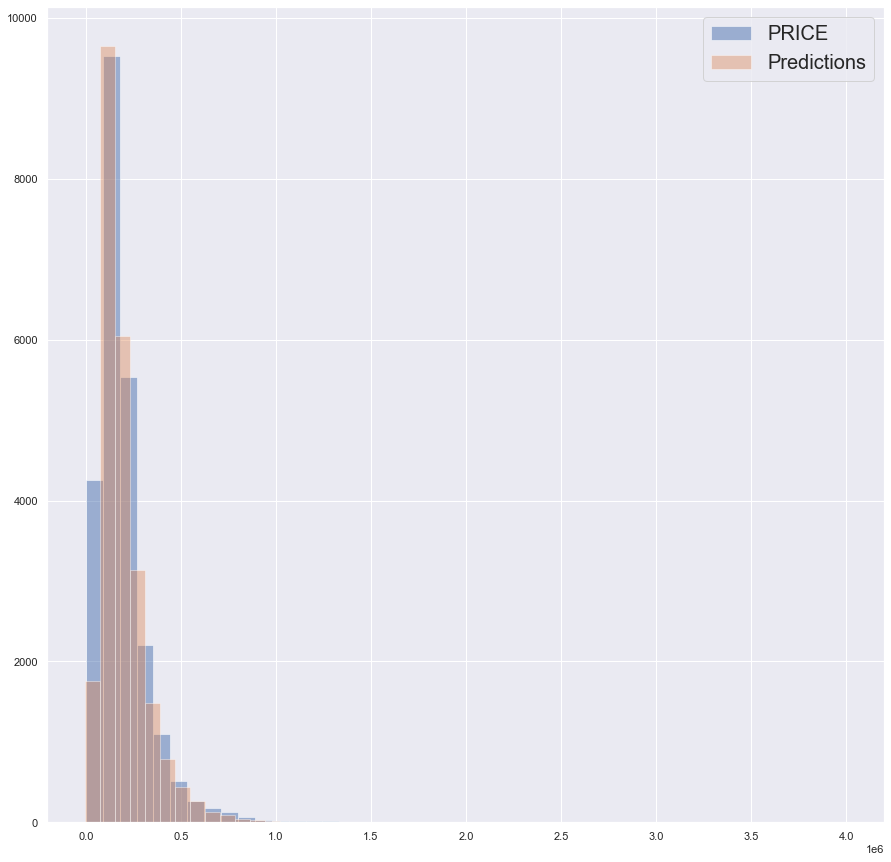

In [40]:
# Validate Predictions

plt.rcParams['figure.figsize'] = (15,15)

predict =predictions.reset_index()[0]
YY_result = YY.reset_index()['PRICE']

compare = pd.DataFrame({'Prediction': predictions, 'Test Data' : df['PRICE']})
print(compare.head(20))

plt.hist(df['PRICE'], bins=45,alpha=0.5, label = 'PRICE')

plt.hist(predictions, bins=40,alpha=0.4, label = 'Predictions')

plt.legend(loc='upper right', prop={'size':20})

plt.show()


### <font color='red'>Insights: 
The regression model may not be so good for low value homes priced under $81,500. </font>